In [36]:
import scipy.io as sio
import os
import numpy as np
from scipy.io import loadmat
from mayavi import mlab
import matplotlib.pyplot as plt
from matplotlib import mlab
import pickle
from sklearn.preprocessing import minmax_scale

In [2]:
filename = './decoding-the-human-brain/DecMeg2014-master/additional_files/NeuroMagSensorsDeviceSpace.mat'
data = loadmat(filename, chars_as_strings=True)
position = data['pos']
orientation = data['ori']
label = data['lab']
sensor_type = data['typ']

    # Normalize orientation for visualization purpose:
orientation = orientation / np.sqrt((orientation * orientation).sum(1))[:,None]
mlab.quiver3d(position[:,0], position[:,1], position[:,2], orientation[:,0], orientation[:,1], orientation[:,2], color=(1,0,0))
mlab.show()

AttributeError: module 'matplotlib.mlab' has no attribute 'quiver3d'

In [51]:
#fftS1=np.zeros(s1.shape)
#for i in
FFTdata_face=[]
FFTdata_scramble=[]
FFTdata=[]
path="./decoding-the-human-brain/MEG_Train_Data"
for x in sorted(os.listdir(path)):
    data = sio.loadmat(path+'/'+x)
    tmp=np.power(np.abs(np.fft.fft(data['X']))[:,:,:188],2)#.reshape(-1,3,102,188)
    for i in range(tmp.shape[0]):
        tmp[i]=minmax_scale(tmp[i],axis=2)
    #FFTdata.append(tmp)
    tmp=tmp.reshape(-1,3,102,188)
    scrambleidx=np.where(data['y']==0)
    faceidx=np.where(data['y']==1)
    FFTdata_face.append(tmp[faceidx[0]])
    FFTdata_scramble.append(tmp[scrambleidx[0]])

In [35]:
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_Face_mini','wb')
pickle.dump(FFTdata_face,f)
f=open('./decoding-the-human-brain/FFT_AllSubject_Training_scramble','wb')
pickle.dump(FFTdata_scramble,f)

Text(0, 0.5, 'Power')

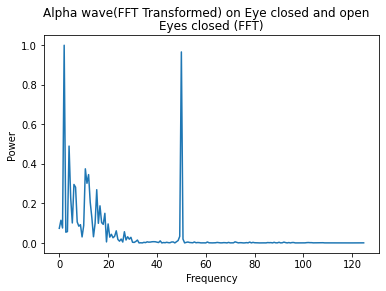

In [49]:
samplingFrequency = 375
samplingInterval  = 1.5/samplingFrequency
df    = 1/1.5
fNQ = 1/samplingInterval/2
xaxis= np.arange(0,fNQ,df)

fig,axes=plt.subplots()
fig.suptitle('Alpha wave(FFT Transformed) on Eye closed and open')
axes.plot(xaxis,FFTdata[0][0,2])
#axes[0].set_xticks(xaxis)
#axes[0].set_xticklabels(xaxis)
axes.set_title('Eyes closed (FFT)')
axes.set_xlabel('Frequency')
axes.set_ylabel('Power')

In [62]:
FFTdata_face[0][0]

array([[[4.96091207e-01, 3.00786870e-02, 4.62404551e-01, ...,
         8.35364781e-03, 7.41579673e-04, 9.60871338e-03],
        [3.23844505e-02, 3.04182640e-01, 1.00000000e+00, ...,
         1.48877151e-03, 3.28248726e-03, 3.66138430e-03],
        [4.72079064e-01, 5.61008530e-02, 6.57048627e-01, ...,
         9.08267100e-05, 1.00086550e-04, 3.50730225e-04],
        ...,
        [1.17900989e-03, 9.02765724e-04, 1.95789349e-02, ...,
         5.44007862e-04, 9.26822163e-05, 5.58313588e-04],
        [1.59574361e-03, 7.90301866e-03, 1.61181220e-01, ...,
         2.14562839e-04, 2.33065433e-04, 1.16173535e-05],
        [3.54224663e-03, 8.05366276e-04, 2.73764475e-02, ...,
         1.39483555e-05, 1.21504718e-04, 6.70104479e-05]],

       [[1.00000000e+00, 1.54810400e-01, 9.32426459e-01, ...,
         1.05221138e-02, 7.00323214e-04, 1.40609268e-02],
        [3.96607572e-02, 1.48036198e-02, 5.38826054e-01, ...,
         1.70447843e-03, 7.93318681e-03, 3.45068995e-03],
        [6.18796708e-03, 